# Computer vision 992 final project
## part one, calculate homography matrix of two images

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

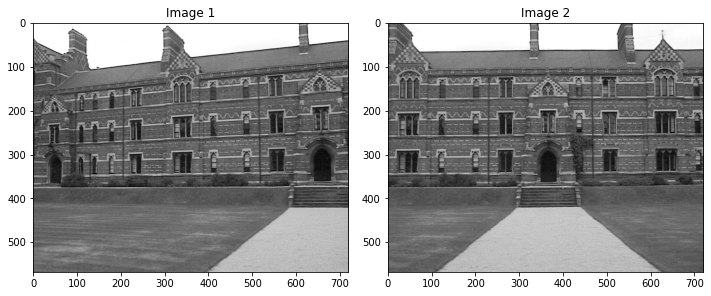

In [22]:
img1 = cv.imread("./images/building1.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("./images/building2.jpg", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Image 1")
plt.subplot(1,2,2)
plt.imshow(img2, cmap="gray")
plt.title("Image 2")
plt.tight_layout()
plt.show()

### Step one, apply harris corner ditector

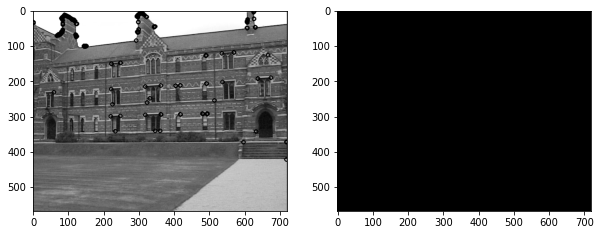

In [23]:
threshold = 85
# Detector parameters
blockSize = 2
apertureSize = 3
k = 0.04
# Detecting corners
dst1 = cv.cornerHarris(img1, blockSize, apertureSize, k)
dst2 = cv.cornerHarris(img2, blockSize, apertureSize, k)
# Normalizing
dst_norm1 = np.empty(dst1.shape, dtype=np.float32)
dst_norm2 = np.empty(dst2.shape, dtype=np.float32)

cv.normalize(dst1, dst_norm1, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
cv.normalize(dst2, dst_norm2, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

dst_norm_scaled1 = cv.convertScaleAbs(dst_norm1)
dst_norm_scaled2 = cv.convertScaleAbs(dst_norm2)

# Drawing a circle around corners
for i in range(dst_norm1.shape[0]):
    for j in range(dst_norm1.shape[1]):
        if int(dst_norm1[i,j]) > threshold:
            cv.circle(img1, (j,i), 5, (0), 2)
for i in range(dst_norm2.shape[0]):
    for j in range(dst_norm2.shape[1]):
        if int(dst_norm2[i,j]) > threshold:
            cv.circle(img2, (j,i), 5, (0), 2)
# Showing the result
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img2, cmap="gray")
plt.show()